https://mset.space - платформа для проведения анализа данных, построения моделей и внедрения моделей в продукцию.


https://mset.space - platform for data analysis, model building and implementation into production.


Ноутбуки для платформы mset.space
https://github.com/MindSetLib/MS-Education

Low code ML - библиотека машинного обучения
https://github.com/MindSetLib/Insolver


Телеграм канал платформы
https://t.me/msetspace

Связь с разработчиками:
telegram: @frankshikhaliev
email: request@mind-set.ru

# dtreeviz

![](https://s8.hostingkartinok.com/uploads/images/2020/12/cc92064b20b3229e3c1a4ee2cfc886c4.png)

10.12.2020

### Установка

Для корректной работы dtreeviz требуется установленная библиотека graphviz.

In [ ]:
!pip freeze | grep dtreeviz

In [ ]:
!pip install graphviz dtreeviz -q

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 204.2MB 72kB/s 
     |████████████████████████████████| 204kB 46.4MB/s 


In [ ]:
!pip freeze | grep dtreeviz

dtreeviz==1.1.3


### Задача регрессии

Для примера используем датасет: [boston house-prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

In [ ]:
from sklearn.datasets import *
from dtreeviz.trees import *

В dtreeviz используются модели из sklearn.

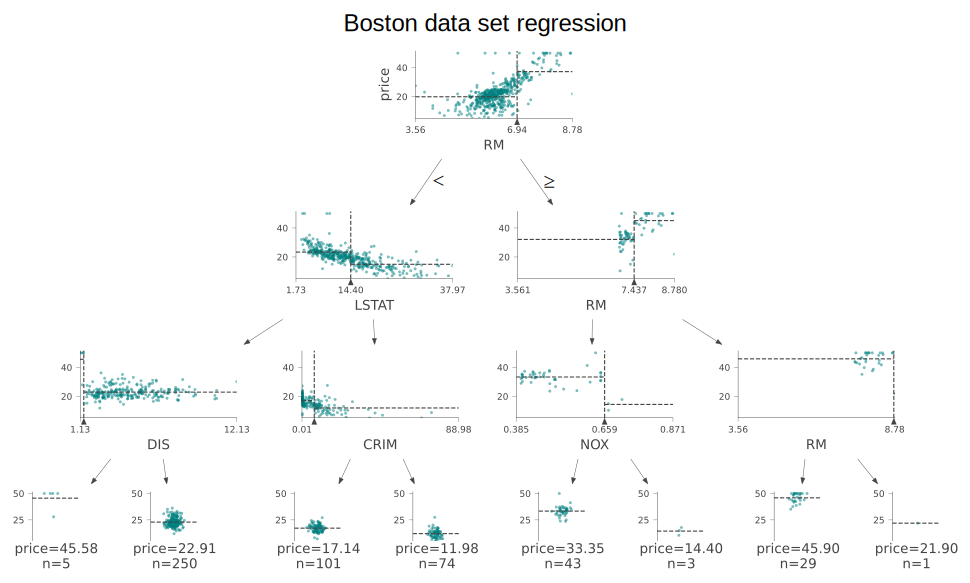

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth=3)
# загрузим данные, получим фичи и таргеты
boston = load_boston()
X_train, y_train = boston.data, boston.target
# тренируем модель
regr.fit(X_train, y_train)

viz = dtreeviz(regr,                                 # модель
               X_train,                              
               y_train,
               target_name = 'price',                # это название будет отображено на листьях
               feature_names = boston.feature_names, # список с названием фичей
               title = 'Boston data set regression', # заголовок изображения
               fontname = 'Arial',                   # фрифт 
               title_fontsize = 16,                  # размер шрифта
               colors = {'title': 'black',           # цвет заголовка
                         'scatter_marker': 'teal'},   # цвет точек
               scale = 1.5,                          # размер изображения
               precision = 2,                        # количество знаков после запятой
               orientation = 'TD'                   # ориентация дерева TD: сверху вних LR: слева на право
              )
viz

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Можно посмотреть в каком листе как распределилась стоимость домов `price`. По оси Y располагаются id листьев, по оси X цена.

Спарва в столбце отображается среднее значение в листе, на графике отображение чёрной чертой.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


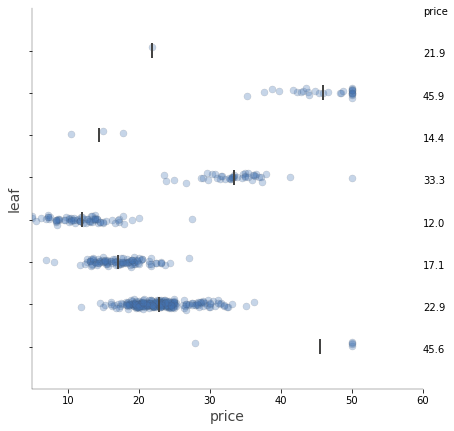

In [ ]:
feature_names = boston.feature_names
target_name = 'price'
viz_leaf_target(regr, X_train, y_train, feature_names, target_name, figsize=(7, 7))

### Задача классификации на 3 класса

Воспользуемся мультиклассовым датасетом: [iris multi-class dataset](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

В данном случае нам нужно передать названия классов `class_names`

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


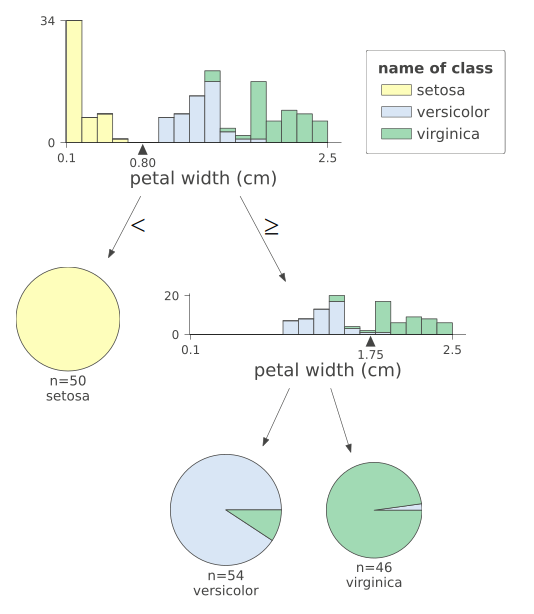

In [ ]:
cls = tree.DecisionTreeClassifier(max_depth=2)  
# загрузим данные, получим фичи и таргеты
iris = load_iris()
X_train, y_train = iris.data, iris.target
# обучим модель
cls.fit(X_train, y_train)

viz = dtreeviz(cls,                                                 # модель
               X_train,
               y_train,
               target_name = 'name of class',                       # название легенды
               feature_names = iris.feature_names,                  # список с названием фичей
               class_names = ['setosa', 'versicolor', 'virginica'], # название классов
               histtype = 'barstacked',                             # стиль отображения 'bar', 'barstacked', 'strip'
               scale = 2)                                      
viz

### Задача классификации на 10 классов

Когда классов больше 4, гистограммы накладываются друг на друга и визуализация получается плохая, поэтому лучше установить `histtype = 'bar'`.

Воспользуемся датасетом [digits](https://scikit-learn.org/stable/datasets/index.html#digits-dataset), в котором хранятся изображения 8x8 пикселей от руки написанных цифр. По изображению необходимо предсказать, какая цифра написана. 

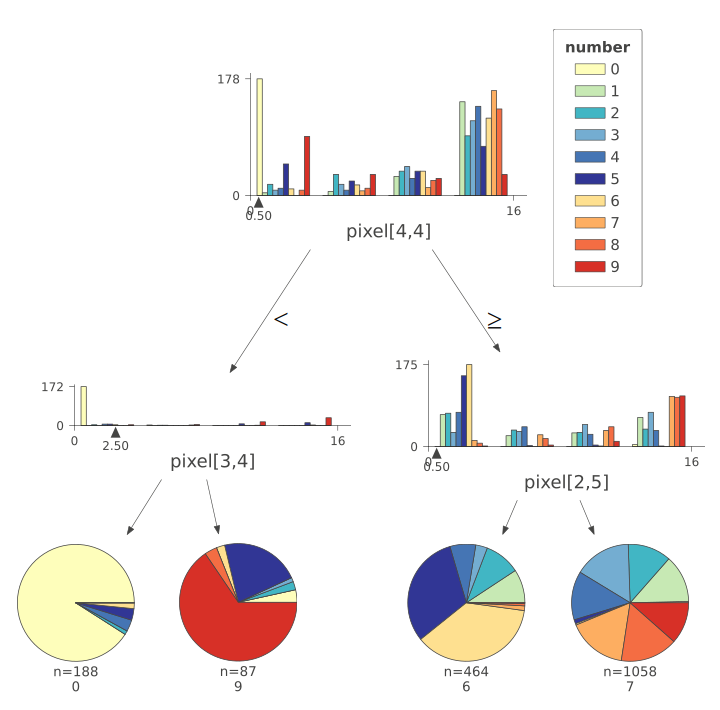

In [ ]:
cls = tree.DecisionTreeClassifier(max_depth=2)  
# загрузим данные, получим фичи и таргеты
digits = load_digits()
X_train, y_train = digits.data, digits.target
# обучим модель
cls.fit(X_train, y_train)

# номер пикселя изображения 8x8 (эл-та матрицы 8x8) | [ pixel[0,0], pixel[0,1], ..., pixel[7,7] ]
columns = [f'pixel[{i},{j}]' for i in range(8) for j in range(8)]

viz = dtreeviz(cls,                                                         # модель
               X_train,
               y_train,
               target_name = 'number',                                      # название легенды                                        
               feature_names = columns,                                     # название фич
               class_names = [str(num) for num in np.unique(y_train)],      # названия классов 0, 1, ..., 9
               histtype = 'bar',                                            # стиль отображения 'bar', 'barstacked', 'strip'
               orientation = 'TD',
               scale = 2)
viz

### Пример одного предсказания

Бывает так, что нам интересно посмотреть, на основании каких критериев модель причислила наблюдению определенный класс.

Воспользуемся датасетом: [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

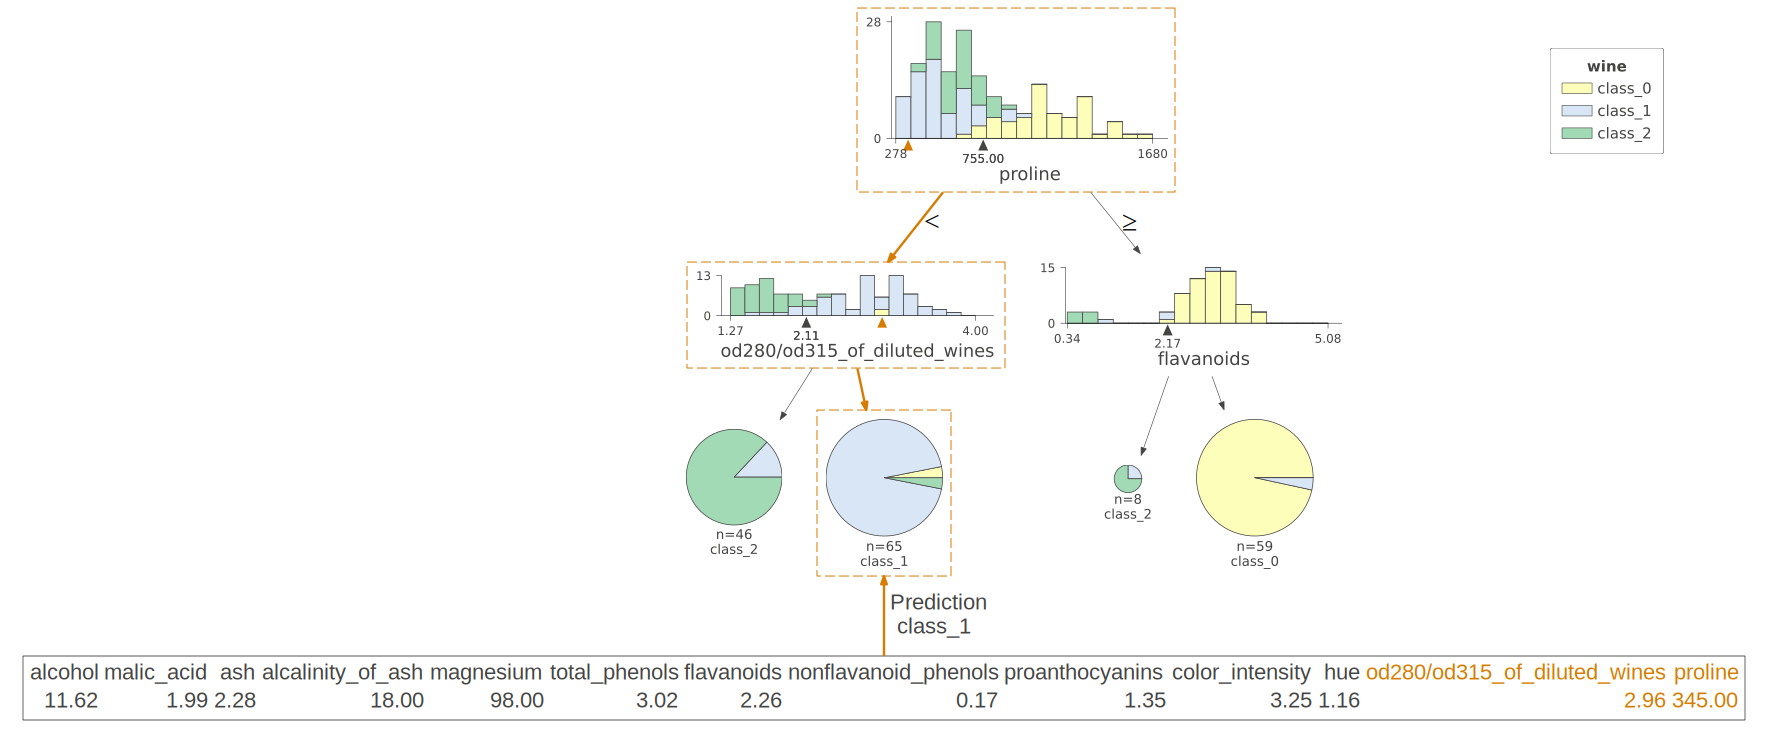

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2)  

wine = load_wine()
X_train, y_train = wine.data, wine.target

clf.fit(X_train, y_train)

# выберим случайное наблюдение
X = wine.data[np.random.randint(0, len(wine.data)),:]

viz = dtreeviz(clf,
               wine.data,
               wine.target,
               target_name = 'wine',
               feature_names = wine.feature_names, # ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
               class_names = list(wine.target_names),
               X = X,  # передадим наблюдение                          
               scale = 2) 
viz

### Граф без гистограм

Построим граф без гистаграм, используя датасет: [Knowledge Dataset](https://github.com/parrt/dtreeviz/blob/master/testing/data/knowledge.csv)

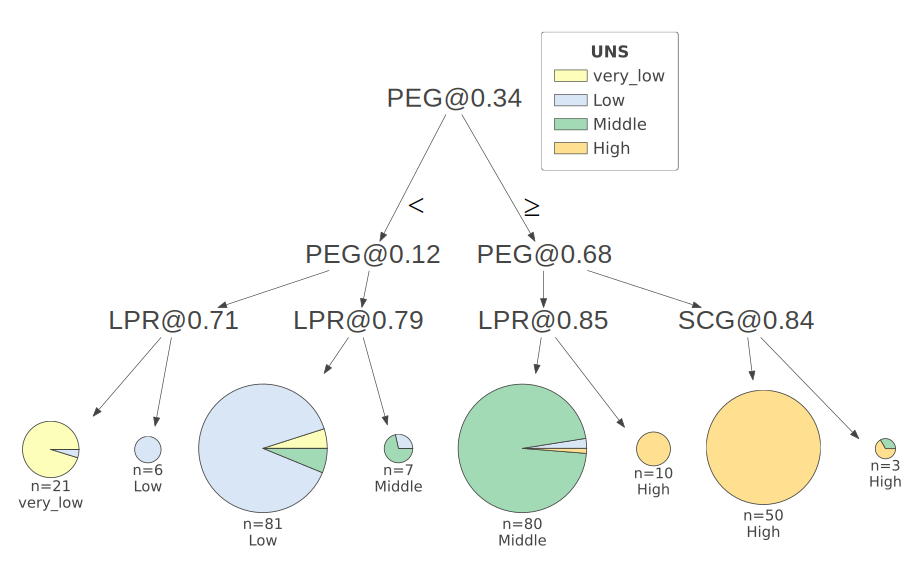

In [ ]:
import sys

clf = tree.DecisionTreeClassifier(max_depth=3)
# загрузим данные
know = pd.read_csv('https://raw.githubusercontent.com/parrt/dtreeviz/master/testing/data/knowledge.csv')

target_names = ['very_low', 'Low', 'Middle', 'High']
# расставим номер класса категориальным фичам
# ['very_low', 'very_low', 'High'] >>> [0, 0, 4]
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(target_names)})
# удалим из таблицы столбец 'UNS' и из него присвоим значения таргет переменной y_train
X_train, y_train = know.drop('UNS', axis=1), know['UNS']

clf = clf.fit(X_train, y_train)

viz = dtreeviz(clf, 
               X_train,
               y_train,
               target_name = 'UNS',
               feature_names  = X_train.columns.values, # ['STG', 'SCG', 'STR', 'LPR', 'PEG']
               class_names = target_names,
               fancy = False,    # укажем, что не нужно строить гистограммы
               scale = 2.2)
viz

In [ ]:
X_train.columns.values

array(['STG', 'SCG', 'STR', 'LPR', 'PEG'], dtype=object)

### Посмотреть кол-во наблюдений в листе

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

In [ ]:
random_state = 42
# загрузим датасет Titanic
df = pd.read_csv('https://gist.github.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv')

# Заменим Nan на среднее значение в столбце Age
df.fillna({'Age': df.Age.mean()}, inplace=True)

# Закодируем категориальные переменные
# ['male', 'male', 'female'] >>> [0, 0, 1]
df['Sex_label'] = df.Sex.astype('category').cat.codes
df['Cabin_label'] = df.Cabin.astype('category').cat.codes
df['Embarked_label'] = df.Embarked.astype('category').cat.codes

# отберем фичи и таргет
features = ['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label']
target = 'Survived'

# инициализируем модель и обучим
cls = DecisionTreeClassifier(max_depth=4, random_state=random_state)
cls.fit(df[features], df[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Отобразим граф и укажем в нём id листка `Node k`

In [ ]:
import matplotlib.pyplot as plt

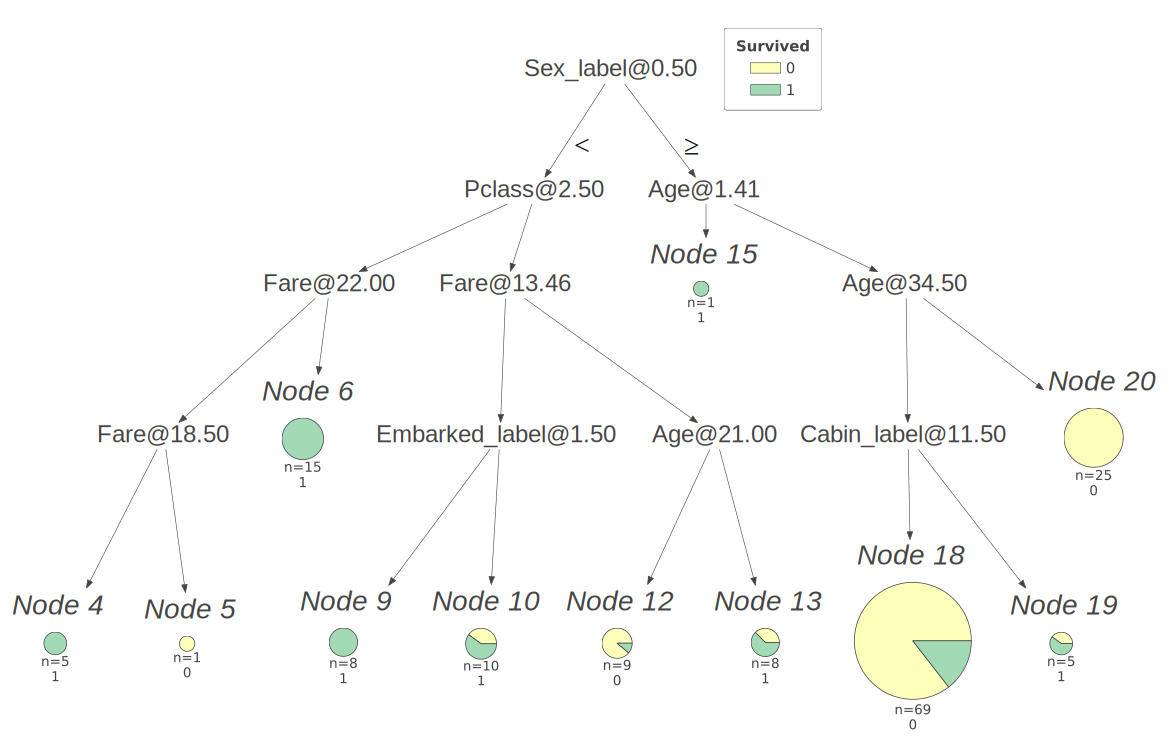

In [ ]:
dtreeviz(cls, 
        df[features],
        df[target],
        target_name = target,
        feature_names  = features,
        class_names = [0, 1],
        fancy = False,           # укажем, что не нужно строить гистограммы
        scale = 2,
        show_node_labels = True) # отобразим id листьев

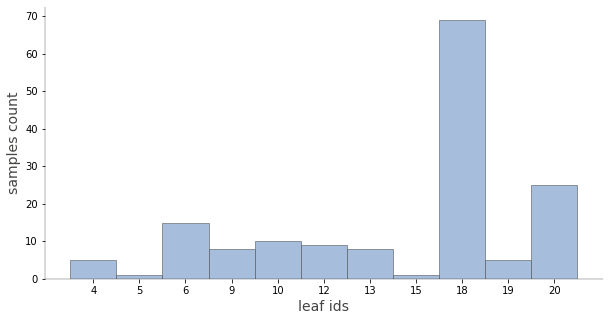

In [ ]:
# по оси X - id листка
# по оси Y - кол-во наблюдений в листке
viz_leaf_samples(cls, df[features], features)


Посмотрим в разрезе по классам.

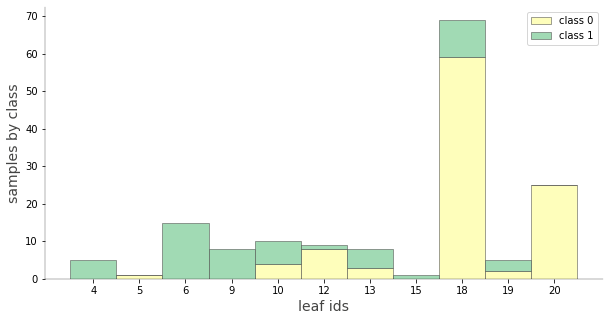

In [ ]:
trees.ctreeviz_leaf_samples(cls, df[features], df[target], features)

Посмотреть метрику Gini в каждом листе. Чем Gini выше, тем больше "хауса" в листе.

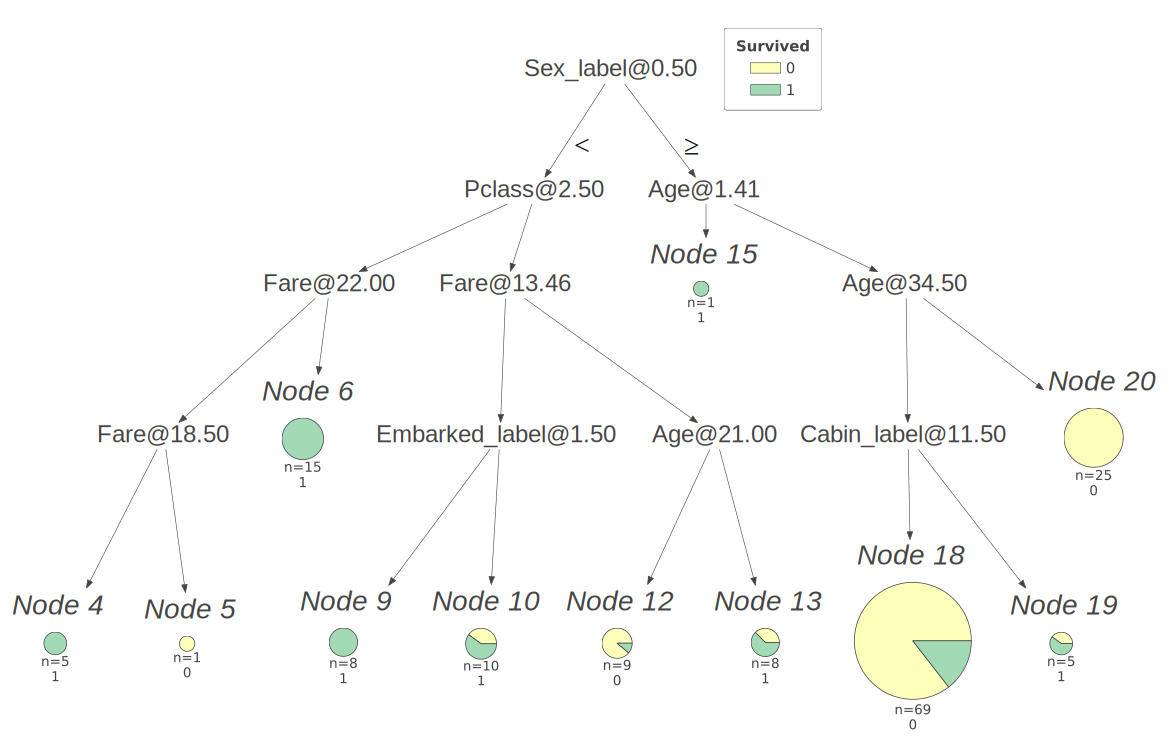

In [ ]:
dtreeviz(cls, 
        df[features],
        df[target],
        target_name = target,
        feature_names  = features,
        class_names = [0, 1],
        fancy = False,           # укажем, что не нужно строить гистограммы
        scale = 2,
        show_node_labels = True) # отобразим id листьев

Посмотрев на столбцы, можем определить листья в которых произошло плохое разбиение, в них находятся наблюдения из различных классов.

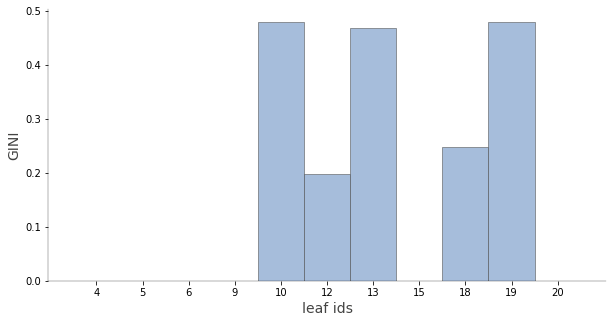

In [ ]:
viz_leaf_criterion(cls)

### Посмотреть статистику по узлам/листьям

In [ ]:
describe_node_sample(cls,
                           node_id = 10,  # укажем в каком узле просмотреть статистику
                           x_data = df[features],
                           feature_names = features)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,10.0,10.000000,10.000000,10.0,10.0,10.0
mean,3.0,24.500000,8.990830,0.0,-1.0,2.0
std,0.0,7.427427,1.691822,0.0,0.0,0.0
min,3.0,14.000000,7.650000,0.0,-1.0,2.0
25%,3.0,20.250000,7.864600,0.0,-1.0,2.0
50%,3.0,24.000000,7.925000,0.0,-1.0,2.0
75%,3.0,27.750000,9.737500,0.0,-1.0,2.0
max,3.0,40.000000,12.475000,0.0,-1.0,2.0


### Интерпретация модели с одной переменной

In [ ]:
features_reg_univar = ['Pclass']
target_reg = 'Age'
reg_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="mae")
reg_univar.fit(df[features_reg_univar], df[target_reg])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Оранжевые линии - это среднее значение. Горизонтальные пунктирные линии разделяющие на классы.

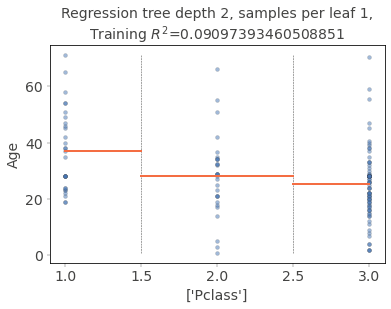

In [ ]:
rtreeviz_univar(reg_univar, df[features_reg_univar], df[target_reg], features_reg_univar, target_reg)

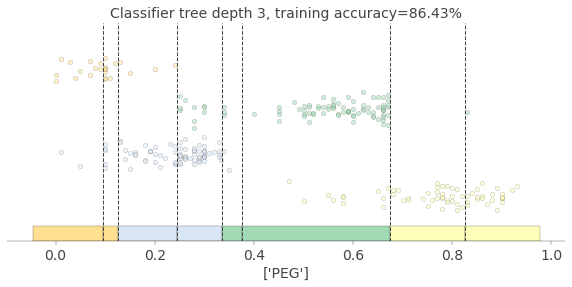

In [ ]:
know = pd.read_csv('https://raw.githubusercontent.com/parrt/dtreeviz/master/testing/data/knowledge.csv')
feature_univar = ['PEG']
target_univar = 'UNS'

# кодировать можно так
# class_names = ['very_low', 'Low', 'Middle', 'High']
# know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

# а так быстрее
know['UNS'] = know['UNS'].astype('category').cat.codes

x_train = know[feature_univar]
y_train = know[target_univar]
cls_univar = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
cls_univar.fit(x_train, y_train)


def change_ctreeviz_univar():
    # нарисуем полотно на котором будем рисовать график
    fig, ax = plt.subplots(1, 1, figsize = (10, 4))
    trees.ctreeviz_univar(cls_univar, x_train, y_train, 
                          feature_names = feature_univar,
                          target_name = target_univar,
                          show = {'splits', 'title'},  # show: отобразить, 'splits': разделительные линии 'title': заголовок
                          ax = ax)
    
change_ctreeviz_univar()

Интерпретация модели с двумя переменными

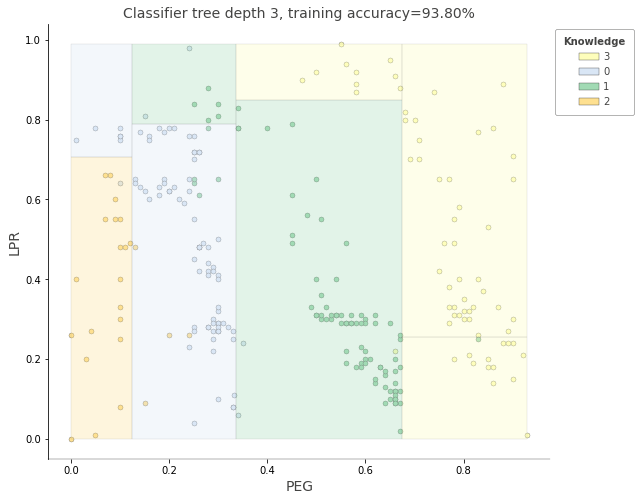

In [ ]:
# укажем номер столбцов, которые мы хотим использовать
features=[4, 3]
# удалим из train целевую переменную
X_train = know.drop('UNS', axis=1)
# выделим целевую переменную
y_train = know['UNS']
# отберем нужные нам признаки
X_train = X_train.values[:, features]
# укажем название классов
class_names = [str(name) for name in know.UNS.unique()]

# инициализируем модель и тренируем
dtc_bivar = DecisionTreeClassifier(max_depth=3)
dtc_bivar.fit(X_train, y_train)

def change_ctreeviz_bivar():
    # plt: https://pyprog.pro/mpl/mpl_main_components.html
    # fig: контейнер самого верхнего уровня, та область на которой все нарисовано
    # ax:  область, где отображаются графики
    # figsize: размер графика
    fig, ax = plt.subplots(1, 1, figsize=(9, 8)) 
    trees.ctreeviz_bivar(dtc_bivar, X_train, y_train, 
                         feature_names = ['PEG','LPR'], 
                         target_name = 'Knowledge', 
                         class_names = class_names, 
                         ax=ax)

change_ctreeviz_bivar()

Ноутбук основан на туториалах: https://github.com/parrt/dtreeviz/tree/master/notebooks